<h1><b>1. Importing Libraries and Packages</b></h1>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

<h1><b>2. Loading and Viewing Data Set</b></h1>

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:

train= pd.read_csv("train.csv", encoding = 'ISO-8859-1')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# To view percentage, add normalize='index'
pd.crosstab(train.Sex , train.Survived , normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


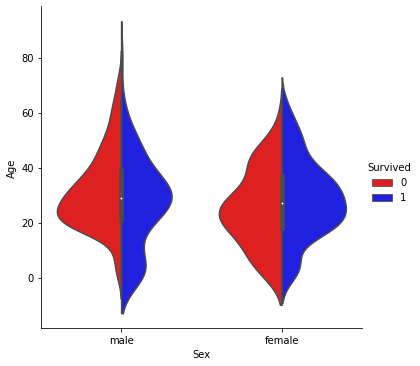

In [ ]:
sns.factorplot(x='Sex' , y='Age' , data=train , hue='Survived' , kind='violin' , palette=['r','b'] , split=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


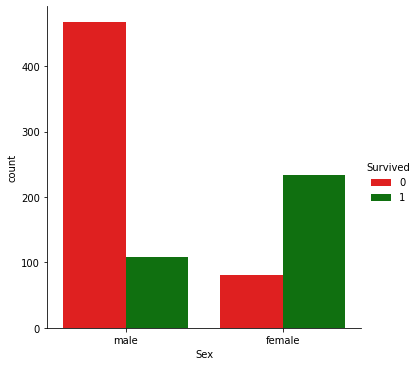

In [ ]:
sns.factorplot(x='Sex' , data=train , hue='Survived' , kind='count' , palette=['r','g'])

In [ ]:
bins = [0,21, 30, 40, 50, 60, 70, 120]
labels = ['0-20','21-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['agerange'] = pd.cut(train.Age, bins, labels = labels,include_lowest = True)

In [ ]:
train.groupby(['Embarked'])['Survived'].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [ ]:
def diagr(feature):
  survival_by_age = train.groupby([feature, 'Survived']).size().unstack('Survived')
  survival_by_age.columns = ['dead', 'survived']

  #survival_by_age['dead'].plot.bar(label="surived", color='pink')
  #survival_by_age['survived'].plot.bar(label="surived")
  survival_by_age.plot.bar(label="surived")
  #plt.savefig('diagram.png')

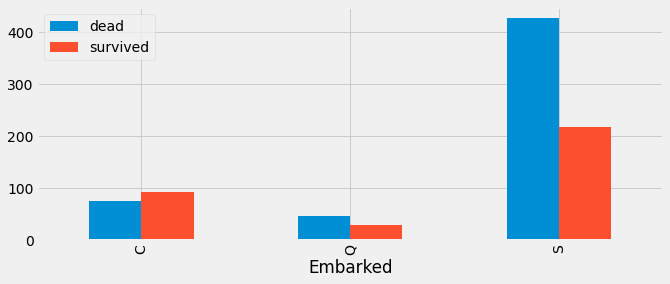

In [ ]:
di=diagr("Embarked")

AttributeError: ignored

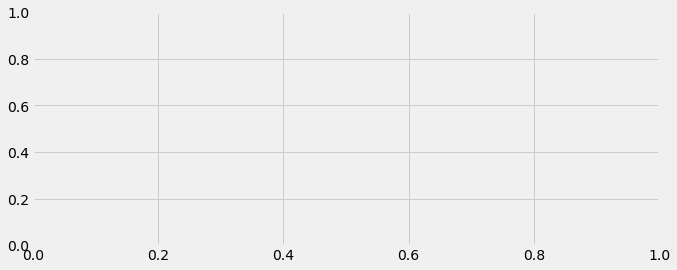

In [ ]:
di=diagr("Embarked")
plt.savefig('diagrea.png')

In [ ]:
train.groupby(['Survived','Embarked']).count()

PassengerId  Pclass  Name  ...  Fare  Cabin  agerange
Survived Embarked                             ...                       
0        C                  75      75    75  ...    75     17        51
         Q                  47      47    47  ...    47      2        20
         S                 427     427   427  ...   427     49       353
1        C                  93      93    93  ...    93     52        79
         Q                  30      30    30  ...    30      2         8
         S                 217     217   217  ...   217     80       201

[6 rows x 11 columns]

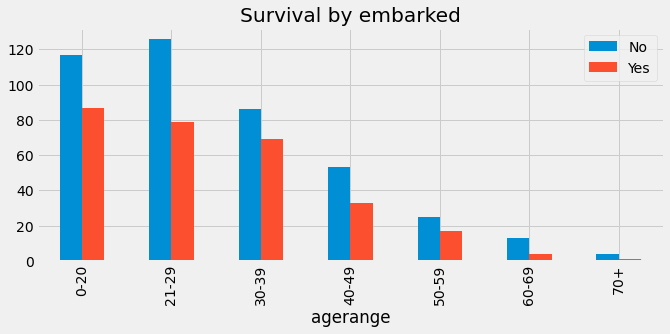

In [ ]:
survival_by_age = train.groupby(['agerange', 'Survived']).size().unstack('Survived')
survival_by_age.columns = ['No', 'Yes']
survival_by_age.plot.bar(title='Survival by embarked')
plt.savefig('diagram.png')

In [ ]:
train.isnull().sum() #untuk mengetahui jumlah data yang nan/kosong sebelum dilakukan preprocessing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1><b>3. Preprocessing Data</h1></b>

In [ ]:
def preprocessing(data):
  data['Age']=data['Age'].fillna(data['Age'].median()) #untuk data umur yang nan/kosong, pada tahap preprocessing diganti dengan median dari umur yang ada pada dataset
  data['Fare']=data['Fare'].fillna(data['Fare'].median()) #untuk data Fare yang nan/kosong, pada tahap preprocessing diganti dengan median dari Fare yang ada pada dataset
  data['Embarked']=data['Embarked'].fillna('S') #untuk data embarked yang kosong/nan akan diganti dengan S
  #data['Cabin'].fillna('Unknown', inplace=True) #untuk data Cabin yang kosong/nan akan diganti dengan Unknown
  data.drop(labels=["Name"], axis = 1, inplace = True) #menghilangkan kolom name
  data.drop(labels=["Ticket"], axis = 1, inplace = True) #menghilangkan kolom tiket
  data.drop(labels=["Cabin"], axis = 1, inplace = True) #menghilangkan kolom tiket
  return data

In [ ]:
preprocessing(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Age  SibSp  Parch  Fare  Embarked
Survived Sex                                                           
0        female           81      81   81     81     81    81        81
         male            468     468  468    468    468   468       468
1        female          233     233  233    233    233   233       233
         male            109     109  109    109    109   109       109

In [ ]:
train.groupby(['Sex','Survived','Pclass']).count()

PassengerId  Age  SibSp  Parch  Fare  Embarked
Sex    Survived Pclass                                                
female 0        1                 3    3      3      3     3         3
                2                 6    6      6      6     6         6
                3                72   72     72     72    72        72
       1        1                91   91     91     91    91        91
                2                70   70     70     70    70        70
                3                72   72     72     72    72        72
male   0        1                77   77     77     77    77        77
                2                91   91     91     91    91        91
                3               300  300    300    300   300       300
       1        1                45   45     45     45    45        45
                2                17   17     17     17    17        17
                3                47   47     47     47    47        47

<h1><b>4. Plotting Visualisasi Data</b></h1>

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

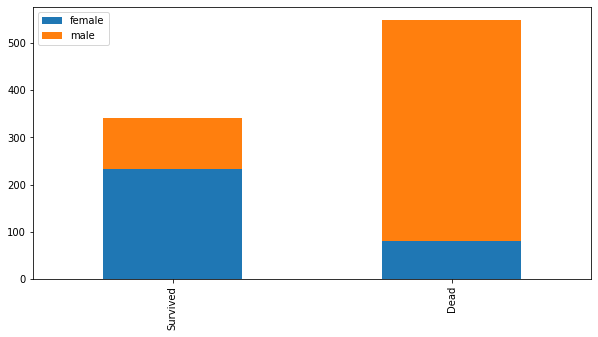

In [ ]:
pie_chart('Sex')

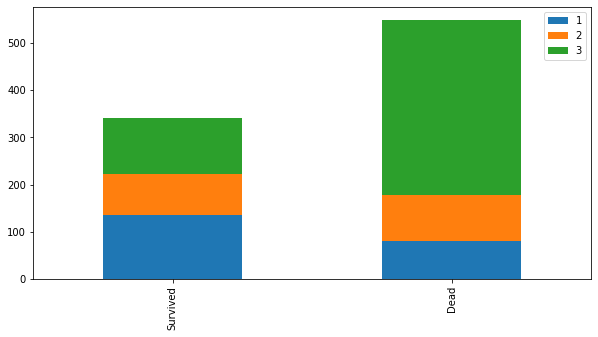

In [ ]:
bar_chart('Pclass')

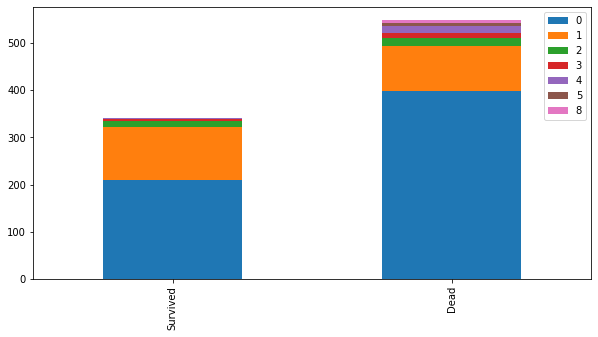

In [ ]:
bar_chart('SibSp')

In [ ]:
def facet(feature):
  data=train
  facet = sns.FacetGrid(data, hue="Survived",aspect=4)
  facet.map(sns.kdeplot,feature,shade= True)
  facet.set(xlim=(0, data[feature].max()))
  facet.add_legend()
  plt.show()

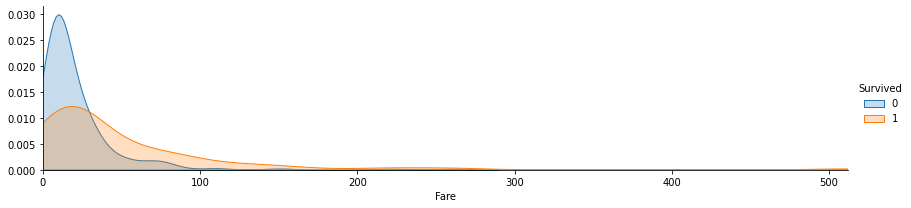

In [ ]:
facet("Fare")

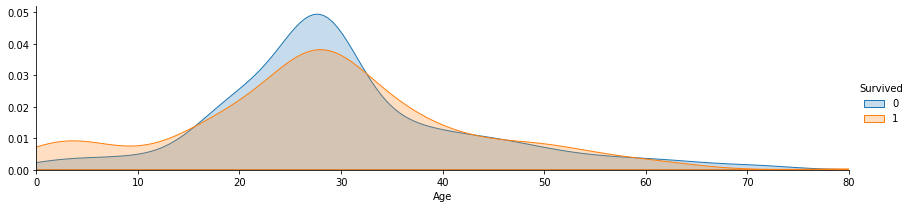

In [ ]:
facet("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


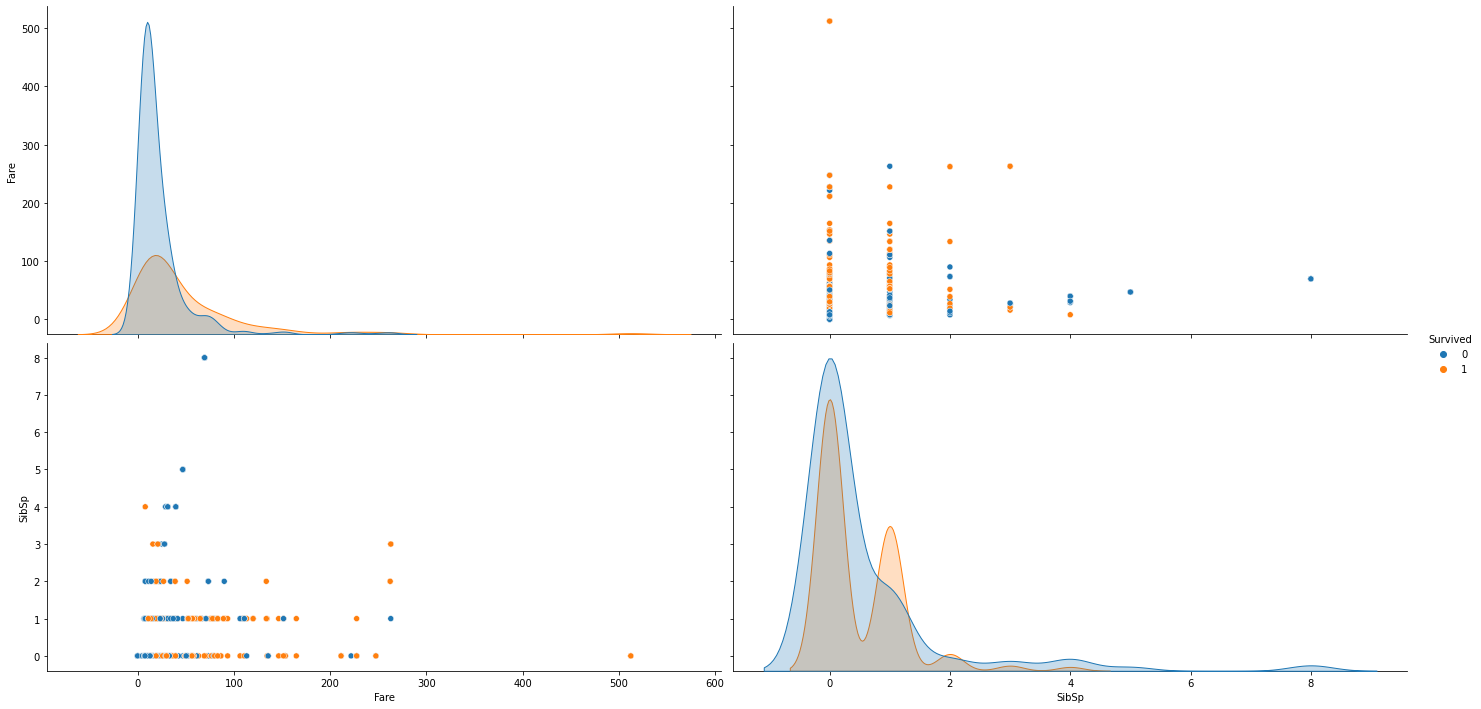

In [ ]:
features = ['Fare', 'SibSp', 'Survived']
sns.pairplot(train[features], hue="Survived", size=5, aspect=2)

<h1><b>5. Featuring
</b></h1>

In [ ]:
def feature(data):
  data['Sex']=data['Sex'].apply(lambda x: 0 if x == "male" else 1)
  data.loc[data['Embarked'] == 'S', 'Embarked'] = 1
  data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2
  data.loc[data['Embarked'] == 'C', 'Embarked'] = 3
  return data

In [ ]:
data_train=feature(train)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,3
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1
887,888,1,1,1,19.0,0,0,30.0000,1
888,889,0,3,1,28.0,1,2,23.4500,1
889,890,1,1,0,26.0,0,0,30.0000,3


<h1><b>6. Modeling and Model Evaluation </b></h1>

<h5>Split data untuk membagi data traning dan data validasi. data traning akan digunakan untuk dibuat pemodelan dan data validasi digunakan sebagai data ntuk menvalidasi model yang telah dibuat

In [ ]:
X = data_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y = data_train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2>Pemodelan dan melakukan prediksi hasil dari data validasi</h2>

In [ ]:
def train_svm(X_train, y_train):
    SVM=LinearSVC(C=0.1)
    SVM.fit(X_train, y_train)
    return SVM

SVM = train_svm(X_train, y_train)
pred_val = SVM.predict(X_test)
print(SVM.score(X_test, y_test))

0.7653631284916201


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize data using preprocessing
traindata = StandardScaler().fit_transform(train)
traindata

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.50244517, -0.58595414],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
         0.78684529,  1.9423032 ],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.47367361,
        -0.48885426, -0.58595414],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  2.00893337,
        -0.17626324, -0.58595414],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
        -0.04438104,  1.9423032 ],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.49237783,  0.67817453]])

<h2>Evaluasi dari model yang dibuat</h2>

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       103
           1       0.78      0.68      0.73        76

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



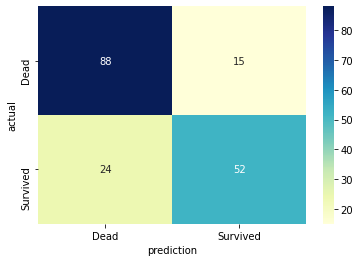

In [ ]:
print(classification_report(y_test, pred_val))
labels = ['Dead','Survived']
cf_matrix = confusion_matrix(y_test,pred_val)
ax = sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

<h1><b>7. Testing</b></h1>

In [ ]:
test= pd.read_csv("test.csv", encoding = 'ISO-8859-1')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
testing=test.copy()
Preprocessing=preprocessing(testing)

In [ ]:
data_testing=feature(Preprocessing)
data_testing

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,1
414,1306,1,1,39.0,0,0,108.9000,3
415,1307,3,0,38.5,0,0,7.2500,1
416,1308,3,0,27.0,0,0,8.0500,1


In [ ]:
X = data_testing[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
pred = SVM.predict(X)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Pclass": test["Pclass"],
        "Name": test["Name"],
        "Sex": test["Sex"],
        "Age": testing["Age"],
        "SibSp": test["SibSp"],
        "Parch": test["Parch"],
        "Ticket": test["Ticket"],
        "Fare": test["Fare"],
        "Cabin": test["Cabin"],
        "Embarked": test["Embarked"],
        "Survived": pred
    })

In [ ]:
submission.loc[submission['Embarked'] == 'S', 'Embarked'] = "Cherbourg"
submission.loc[submission['Embarked'] == 'Q', 'Embarked'] = "Queentown"
submission.loc[submission['Embarked'] == 'C', 'Embarked'] = "Southampton"
submission.loc[submission['Pclass'] == 1, 'Pclass'] = "Upper"
submission.loc[submission['Pclass'] == 2, 'Pclass'] = "Middle"
submission.loc[submission['Pclass'] == 3, 'Pclass'] = "Lower"

In [ ]:
submission

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queentown,0
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Cherbourg,0
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queentown,0
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Cherbourg,0
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Cherbourg,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Lower,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,Cherbourg,0
414,1306,Upper,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Southampton,1
415,1307,Lower,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Cherbourg,0
416,1308,Lower,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,Cherbourg,0


In [ ]:
submission.to_csv("result.csv")